# Clothes Exploration

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import nltk

In [34]:
# dataframe for clothes
df = pd.read_csv('wcreview.csv')
df.shape

(23486, 11)

# Summary of Data to be Explored

In [35]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# Key Questions!
## Q.1- What are the common words used?
## Q.2- What are the age demographics of the reviewers?


In [36]:
# Converting the Title and Review Text sections into a .txt file
review_df = df[['Title','Review Text']]
review_df.to_json(r'./review_frame.json')

with open('review_frame.json') as json_file:
    jsonData = json.load(json_file)

    with open('titlewords.txt', 'w') as tw:
        for i in range(len(jsonData['Title'])):
            if (jsonData['Title'][f'{i}'] == None):
                continue
            tw.write(jsonData['Title'][f'{i}'])
            tw.write('\n')

    with open('reviewwords.txt', 'w') as rw:
        for i in range(len(jsonData['Review Text'])):
            if (jsonData['Review Text'][f'{i}'] == None):
                continue
            rw.write(jsonData['Review Text'][f'{i}'])
            rw.write('\n')

In [37]:
# Tokenizing words from .txt files

with open('titlewords.txt', 'r') as file:
    titleData = file.read()
with open('reviewwords.txt', 'r') as file:
    reviewData = file.read()

# Title Word Count
tc_token = titleData.split()

tc_words = []
for word in tc_token:
    tc_words.append(word.lower())

nltk.download("stopwords")

# Review Word Count
rc_token = reviewData.split()

rc_words = []
for word in rc_token:
    rc_words.append(word.lower())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aifut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Removing Stop Words
sw = nltk.corpus.stopwords.words('english')

# Title Count
# getting the list without stop words
words_tc=[]
for word in tc_words:
    if word not in sw:
        words_tc.append(word)
words_tc[:5]

# Review Count
# Getting the review words without the stop-words
words_rc=[]
for word in rc_words:
    if word not in sw:
        words_rc.append(word)
words_rc[:5]


['absolutely', 'wonderful', '-', 'silky', 'sexy']

# Q1. What are the most common words?
### Looking at the results, we find that people tend to mostly leave positive reviews. The top 20 most frequent words used in Reviews and their titles, we mainly find clothing item descriptors and what they feel about the clothes
### Taking a closer look at the top 12, we find that the words [Dresses, Tops, Summer] are mentioned. Giving us a clear indication that summer wear is very popular.

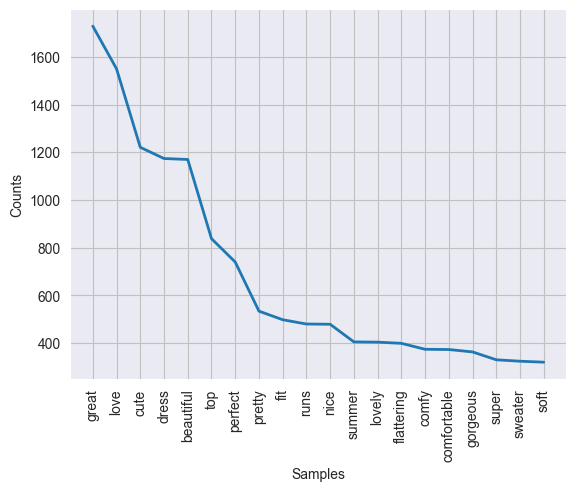

<Axes: xlabel='Samples', ylabel='Counts'>

In [39]:
# Displaying Title Word Count
sns.set_style('darkgrid')
nlp_words = nltk.FreqDist(words_tc)
nlp_words.plot(20)

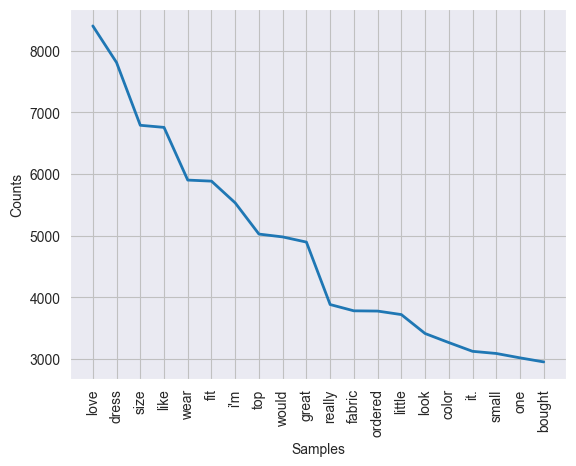

<Axes: xlabel='Samples', ylabel='Counts'>

In [40]:
# Displaying Title Word Count
sns.set_style('darkgrid')
nlp_words = nltk.FreqDist(words_rc)
nlp_words.plot(20)

# Q2. What are the demographics of the reviewers?
### Taking a look at our data, we find that we are working with 23486 reviews, so we'll be assuming that we are working with ~23500 individual reviewers. While there are bound to be some duplicates in the ages, we will treat each as a unique user.
### We will be using a common age-segmentation distribution.
###  With ages cut between: 18-24, 25-34, 35-44, 45-54, 55-64, 65+


([<matplotlib.patches.Wedge at 0x281c0a94450>,
 [Text(1.092179064575765, 0.1309385004588315, '18-24'),
  Text(0.656852594151015, 0.8823517833364889, '25-34'),
  Text(-0.9761964899844474, 0.506991531430304, '35-44'),
  Text(-0.35310157396134395, -1.0417865800949933, '45-54'),
  Text(0.772335938253739, -0.7832606197695099, '55-61'),
  Text(1.0811493255927482, -0.20277114136470675, '65+')],
 [Text(0.5957340352231444, 0.07142100025027173, '4%'),
  Text(0.35828323317328087, 0.48128279091081205, '22%'),
  Text(-0.5324708127187894, 0.2765408353256203, '33%'),
  Text(-0.1926008585243694, -0.5682472255063599, '22%'),
  Text(0.4212741481384031, -0.42723306532882355, '13%'),
  Text(0.5897178139596807, -0.1106024407443855, '6%')])

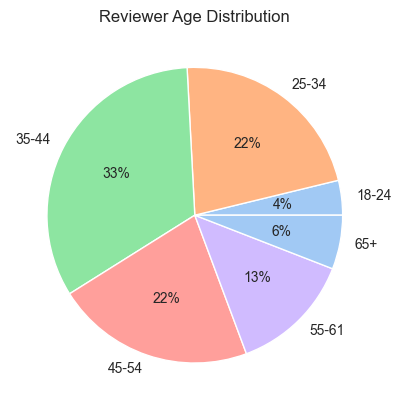

In [41]:
# Getting the number of people by age group
age_df = df['Age']
age_18to24 = len(df[age_df.between(18,24)])
age_25to34 = len(df[age_df.between(25,34)])
age_35to44 = len(df[age_df.between(35,44)])
age_45to54 = len(df[age_df.between(45,54)])
age_55to61 = len(df[age_df.between(55,64)])
age_65 = len(df[age_df.between(65,120)])


age_groups = []
age_groups.extend((age_18to24,age_25to34,age_35to44,age_45to54,age_55to61,age_65))

# labels for the group
age_labels = ['18-24','25-34','35-44','45-54','55-61','65+']

# define seaborn color palette
age_colors = sns.color_palette('pastel')[0:5]

# create pie chart
plt.title("Reviewer Age Distribution")
plt.pie(age_groups, labels = age_labels, colors = age_colors, autopct='%.0f%%')

